# RM branch with attached photographs

Creates the Entity-relationships diagram (ERD) of EAMENA Heritage Places (HP) and color nodes according to the [mds-template-readonly.tsv](https://github.com/eamena-project/eamena-arches-dev/blob/main/dbs/database.eamena/data/reference_data/mds/mds-template-readonly.tsv) file (see: [GitHub documentation](https://github.com/eamena-project/eamena-arches-dev/tree/main/dbs/database.eamena/data/reference_data#templates))

Load GitHub repository, requirements and libraries

In [1]:
# download ACHP graph_mixer
!rm cultural-heritage -R
!git clone https://github.com/achp-project/cultural-heritage.git
!pip install  -q -r  cultural-heritage/graph-parser/requirements.txt
%cd /content/cultural-heritage/graph-parser/
import graph_mixer as gm

# download EAMENA erms
%cd /content/
!rm eamena-functions -R
!git clone https://github.com/eamena-project/eamena-functions.git
%cd /content/eamena-functions/mds
import mds

# download EAMENA data
%cd /content/
!rm /content/eamena-data -R
!git clone https://github.com/eamena-project/eamena-data.git

# librairies
import os
import urllib.request
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interactive
from IPython.display import Image as IpImg
from IPython.display import Markdown, display, HTML, clear_output
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import re
from pyvis import network as net
import folium
import json
from google.colab import files
import random

!pip install exif
from exif import Image as exImg

Cloning into 'cultural-heritage'...
remote: Enumerating objects: 3290, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 3290 (delta 11), reused 7 (delta 3), pack-reused 3260
Receiving objects: 100% (3290/3290), 36.74 MiB | 18.44 MiB/s, done.
Resolving deltas: 100% (2397/2397), done.
Updating files: 100% (661/661), done.
/content/cultural-heritage/graph-parser
/content
Cloning into 'eamena-functions'...
remote: Enumerating objects: 287, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 287 (delta 40), reused 59 (delta 23), pack-reused 210
Receiving objects: 100% (287/287), 59.85 KiB | 2.22 MiB/s, done.
Resolving deltas: 100% (163/163), done.
/content/eamena-functions/mds
/content
Cloning into 'eamena-data'...
remote: Enumerating objects: 253, done.
remote: Counting objects: 100% (253/253), done.
remote: Compressing objects: 100% (175/175), done.
remote: Tota

## Select

Select the EAMENA HP Resource Model (RM) within the listed RMs

List of available RMs

In [2]:
%cd /content/cultural-heritage/graph-parser/
!rm inputResourceModels -R
!mkdir -p inputResourceModels
remote_source_files_1 = dict()
# src = 'https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/main/dbs/ea.train/data/reference_data/rm/hp/Heritage%20Place.json'
src = 'https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/main/dbs/ea.train/data/reference_data/rm/hp/Sub-typology-branch.json'
remote_source_files_1['EAMENA'] = src
gm.rm_selected_one('EAMENA', remote_source_files_1)

/content/cultural-heritage/graph-parser
rm: cannot remove 'inputResourceModels': No such file or directory
EAMENA_Sub-typology-branch.json has been loaded into the folder inputResourceModels/


In [3]:
!ls '/content/cultural-heritage/graph-parser/inputResourceModels/'

EAMENA_Sub-typology-branch.json


In [3]:
with open('/content/cultural-heritage/graph-parser/inputResourceModels/EAMENA_Sub-typology-branch.json', 'r') as file:
    data = json.load(file)
    print(json.dumps(data, indent=4))  # This prints the JSON data formatted nicely


{
    "graph": [
        {
            "author": " ",
            "cards": [
                {
                    "active": true,
                    "cardid": "5c02c61f-f77b-401c-bcab-6814b89448ad",
                    "component_id": "f05e4d3a-53c1-11e8-b0ea-784f435179ea",
                    "config": null,
                    "constraints": [],
                    "cssclass": null,
                    "description": {
                        "en": ""
                    },
                    "graph_id": "0f0e2b0a-e7f5-4bab-b996-98ddb709e9dc",
                    "helpenabled": false,
                    "helptext": {
                        "en": null
                    },
                    "helptitle": {
                        "en": null
                    },
                    "instructions": {
                        "en": null
                    },
                    "is_editable": true,
                    "name": {
                        "en": "Sub-typology"
      

## Read

Create subgraph and comparison dataframe csv files by running [graph-parser.py](https://github.com/achp-project/cultural-heritage/blob/main/graph-parser/graph_parser.py) and [graph-comparator.py](https://github.com/achp-project/cultural-heritage/blob/main/graph-parser/graph_comparator.py)

In [4]:
!python /content/cultural-heritage/graph-parser/graph_comparator.py -d -m list -o subgraphMetrics.csv inputResourceModels/*.json
subgraph_metrics = pd.read_csv('subgraphMetrics.csv')
subgraph_metrics

,Unnamed: 0,graph_name,graph_id,source_property,target_property,relation_type,source_id,target_id,source_name,target_name
0,0,EAMENA_Sub-typology-branch,0f0e2b0a-e7f5-4bab-b996-98ddb709e9dc,E1_CRM_Entity,E55_Type,P2_has_type,2a71ad42-1366-11ef-a316-f3df69eec361,9cf430e2-1366-11ef-a316-f3df69eec361,Sub-typology,Others
1,1,EAMENA_Sub-typology-branch,0f0e2b0a-e7f5-4bab-b996-98ddb709e9dc,E1_CRM_Entity,E55_Type,P2_has_type,2a71ad42-1366-11ef-a316-f3df69eec361,6f7887c6-1366-11ef-a316-f3df69eec361,Sub-typology,Kites


## Show

In [16]:
rm_project= 'EAMENA'
filename = rm_project + "-erd.html"
mds_template_df = mds.mds_template()
mds_template_df['Enhanced record minimum standard'] = mds_template_df['Enhanced record minimum standard'].str.contains(r'Yes', case = False, na = False, regex = True).astype(int)
mds_template_df = mds_template_df.loc[mds_template_df['Enhanced record minimum standard'] == 1]
in_erms = list(mds_template_df['uuid_sql'])
G = gm.create_rm_graph(rm_project= rm_project, color_fields = mds_template_df)
hp_G = gm.plot_net_graph(G, filename = filename, width = "1200px", height = "1000px")
HTML(filename = filename)

## Export

In [ ]:
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

In [6]:
# cases_path = "/content/eamena-data/reference-data/concepts/heritage_places/cases/"
cases_img_path = "https://raw.githubusercontent.com/eamena-project/eamena-data/main/reference-data/concepts/heritage_places/cases/img/" # cases_path + "img/"
# list
list_path = 'https://raw.githubusercontent.com/eamena-project/eamena-data/main/reference-data/concepts/heritage_places/cases/list-branch.tsv'

In [7]:
df_list = pd.read_csv(list_path, sep='\t')
df_list['image_path'] = cases_img_path + df_list['image']
df_list

,label,image,uuid,uuid_parent,image_path
0,Kite type - Star-shaped,kitetype-star.png,f4f0052e-2cfe-4550-b43a-96d1d0ac8846,88d843a6-0a87-44f0-9c05-fd6c3aed7f20,https://raw.githubusercontent.com/eamena-proje...
1,Kite type - Rounded Arrow,kitetype-roundedarrow.png,f5ba6ff6-e304-4995-afe8-8e36537dcbc6,88d843a6-0a87-44f0-9c05-fd6c3aed7f20,https://raw.githubusercontent.com/eamena-proje...
2,Kite type - Bag-shaped,kitetype-bag.png,21dc0d6e-1c00-4d92-8bc2-0e021d088ffb,88d843a6-0a87-44f0-9c05-fd6c3aed7f20,https://raw.githubusercontent.com/eamena-proje...
3,Kite type - Sock-shaped,kitetype-sock.png,1e300266-a07a-4354-98ae-9b24acf4fecf,88d843a6-0a87-44f0-9c05-fd6c3aed7f20,https://raw.githubusercontent.com/eamena-proje...
4,Kite type - Trapezoid,kitetype-trapezoid.png,644e7793-4653-428c-86c8-2b8fb044488b,88d843a6-0a87-44f0-9c05-fd6c3aed7f20,https://raw.githubusercontent.com/eamena-proje...


**644e7793-4653-428c-86c8-2b8fb044488b**

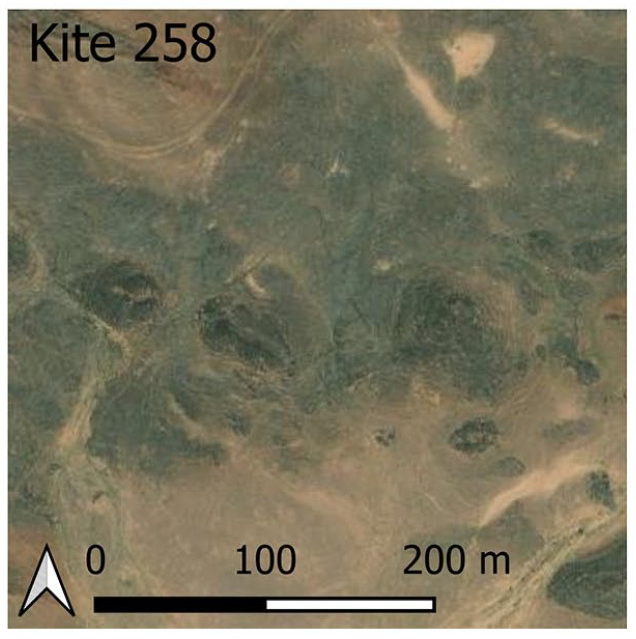

**Kite type - Trapezoid**

In [12]:
my_range = range(1, len(df_list))
i = random.sample(my_range, 1)[0]
display(Markdown(f"**{df_list.loc[i, 'uuid']}**"))
display(IpImg(df_list.loc[i, 'image_path']))
display(Markdown(f"**{df_list.loc[i, 'label']}**"))

In [21]:
G.nodes

NodeView(('2a71ad42-1366-11ef-a316-f3df69eec361', '9cf430e2-1366-11ef-a316-f3df69eec361', '6f7887c6-1366-11ef-a316-f3df69eec361'))

In [18]:
# OK
# rm_project= 'EAMENA'
# filename = rm_project + "-erd-concepts.html"
# mds_template_df = mds.mds_template()
# mds_template_df['Enhanced record minimum standard'] = mds_template_df['Enhanced record minimum standard'].str.contains(r'Yes', case = False, na = False, regex = True).astype(int)
# mds_template_df = mds_template_df.loc[mds_template_df['Enhanced record minimum standard'] == 1]
# in_erms = list(mds_template_df['uuid_sql'])
# G = gm.create_rm_graph(rm_project= rm_project, color_fields = mds_template_df)
# # create the graph of images
G1 = gm.create_img_graph(G = G, mass = 5, size = 30, list_path = 'https://raw.githubusercontent.com/eamena-project/eamena-data/main/reference-data/concepts/heritage_places/cases/list-branch.tsv')
# merge with the RM graph
G_merged = nx.compose(G, G1)
hp_G = gm.plot_net_graph(G_merged, filename = filename, width = "1200px", height = "1000px")
HTML(filename = filename)

*read: 88d843a6-0a87-44f0-9c05-fd6c3aed7f20
